## Feature preprocessing and generation with respect to models of Week1

In [1]:
from IPython.display import Image
import pandas as pd

# Overview

**메인 토픽**
    - Feature preprocessing
    - Feature generation
    - Their dependence on a model type

**numeric, categorical, ordinal, datetime, coordinates** 의 feature type 에 대해 알아보고

**Missing values** 의 처리 방법에 대해서 알아 볼 것이다

---------------------------------------------------------------------------------------  

**Feature type이 중요한 이유**
    1. preprocessing 방법과  model의 성능에 강한 연관성이 있고,
    2. 각 feature type에 일반적인 feature generation 방법들이 있기 때문

#### 1. feature preprocessing

각 feature type들은 적절한 방식으로 preprocessing 되어야, 모델의 성능을 improve할 수 있다.

즉, 우리가 사용할 model에 따라 preprocessing 방법이 달라져야한다!

(e.g.) X1 feature와 Y 가 non-linear 관계
>  linear model을 쓰면 성능이 ↓ 
>
> 그럴 때 쓸 수 있는 *one-hot encoding*
> 
> 하지만 random forest를 쓴다면?
> 
> 그렇게 안해도 됨.
>
> rf는 feature의 각 value들을 분리해서 보고, 최적의 확률을 찾아냄 (split)

#### 2. Feature generation

모델을 잘 이해하면 유용한 feature를 만드는데 도움이 된다.

(e.g.) 

linear하게 증가하는 target value가 있다 (상품의 수요)

train : 3,4,5월 / test : 6,7 월

**모델에게 이 정보를 알려주고 싶다**

> feature로 week number를 추가한다. 
> 
> linear 모델의 경우 week number feature로 linear한 정보를 얻는다.
>
> gbdt 의 경우 week number feature를 각 week의 mean target value로 받아 들인다.


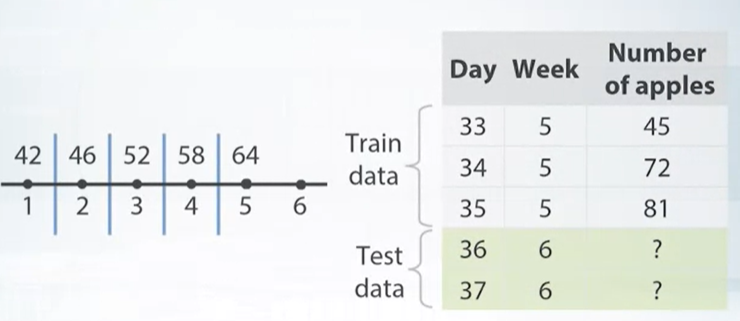

In [11]:
Image("img1.png")

]> 위 그림을 보면 training에는 값이 5까지만 있기 때문에, test의 6이라는 값은 5 라는 값과 같은 의미를 가지게 됨.
> 
> 즉 linear한 정보를 주지 못한다

**이 예시가 보여주는 것 : 어떤 모델을 적용하는가에 따라 feature generation 방법도 달라져야한다!**

*요약*
1. Feature preprocessing is necessary. 모델에 넣을라면 필수임
2. Feature generation은 powerful 한 skil임
3. Feature preprocessing과 generation은 어떤 모델이냐에 따라 달라져야함!

--------------

# Numeric Features

**메인토픽**

- Preprocessing

    a) Tree-based model

    b) Non-tree based model


- Feature generation

--------

### preprocessing

numeric feature preprocessing에서 먼저 이해해야 하는 것은

**feature scale에 영향을 받는 모델과 그렇지 않은 모델** 이다

----
Tree based model
- feature에 constant를 곱해도 똑같이 split한다. scale에 영향 X

Nearest Neighbor
- 거리 기반이므로 어느 feature에 값을 곱하거나 하면 거리가 멀어지거나 가까워지는 왜곡 발생

linear model
- feature의 scale이 다르면 regularization이 equal하게 적용되지 못한다.
- 적절한 scaling을 안하면 gradient descent가 이상해짐
 
Neural Network
- linear model이랑 비슷한 이유임

----
*feature scaling이 다른 것이 model quality에 영향을 준다*

-----
가장 쉬운 방법은 모든 feature를 동일한 scale로 scaling 해버리기

1. MinMaxscaling

    scale만 달라지고 분포는 똑같이 유지됨.


2. StandardScaler
    
    평균 0, 표준편차 1인 분포로 transformation
    


MinMaxscaling의 예시


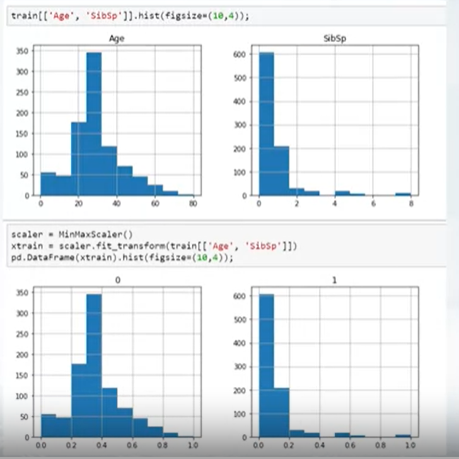

In [7]:
print('MinMaxscaling의 예시')
Image("img2.png")

### preprocessing : outliers

linear model을 outlier에서 보호하려면 

lower bound와 upper bound를 이용해서 feature를 짤라내야한다

> ex) 1 percentile, 99s percentile
    
=> 요것이 winsorization 이라고 불린다

> upperbound, lowerbound = np.percentile(x,[1,99])
> 
> y = np.clip(x, upperbound, lowerbound)

### preprocessing : rank

기본적으로 rank preprocessing은 다양한 값의 간격을 동일하게 만들어 준다

outlier가 있을 경우 MinMaxScaler보다 좋은 효과
> Why?
>
> outlier를 다른 값과 가까이에 위치하게 만들기 때문

outlier 를 하나하나 다 확인하고 처리할 시간이 없을 때 rank를 사용하면

linear model / KNN / NN 에게 좋은 효과를 보인다

> scipy.stats.rankdata
---

*주의*

test 데이터에 적용할 때
- train과 concat해서 하거나
- train에 적용했던 mapping을 잘 저장해뒀다가 test에 적용

### preprocessing : more

- log 변환
> np.log(1+x)

- 1보다 작은 수 제곱
> np.sqrt(x+2/3)

non tree based model에 좋고 ,neural network에 특히 좋다
> Why?
> 
> feature의 매우 큰 값을 feature의 평균 값쪽으로 끌고 오는 효과가 있기 때문
> 
> 이에 따라서
> 
> 0에 가까운 값이 좀 더 distinguishable 해진다? (이해못함)

preprocessing을 마친 후

- 다양한 preprocessing을 수행한 후에 concat하여 df 만들기
- preprocessing을 다르게 한 여러 모델을 mix

이렇게 하면 모델에 좋은 영향 ( linear model, NN, KNN ) 

-----------

### Feature generation

- 사전 지식
- EDA

예시

1. feature 끼리 곱하기 / 나누기 / 더하기 / 빼기 로 feature generation 해도 model에 좋은 효과
> linear말고  tree based model에도

2. float 값이 있을 때, 소수점에 해당하는 값만 취하기(가격같은 경우)

### 요약
1. numeric featrue processing은 tree base model과 non tree base model에 다른 방법을 써야한다.
    - tree based model은 scaling에 영향 X
    - non tree based model은 scaling에 매우 영향

2. scaling이 중요한 hyperparameter일 수 있다.
    - minmax
    - standard scaler
    - rank
    - log, sqrt

3. feature generation은 매우 중요함
    - 사전지식
    - EDA => 다음 챕터에서 배움


----

# Categorical and ordinal features

메인토픽

- 각 model type에 어떤 preprocessing이 적합할지

- categorical 과 ordinal feature가 차이가 무엇인지

- feature generation을 어떻게 해야하는지

### Ordinal Feature

- Ticket class : 1,2,3

- Driver's license : A,B,C,D

- Education : kindergarden, school, undergraduate, bachelor, master, doctoral

---

example data

In [7]:
pd.DataFrame({'PClass' : [3,1,3,1,3],
            'Sex' : ['male','female','female','male','female'],
            'Cabin' : ['NaN','C85','NaN','C123','Nan'],
            'Embarked' : ['S','C','S','S','S']})

,PClass,Sex,Cabin,Embarked
0,3,male,NaN,S
1,1,female,C85,C
2,3,female,NaN,S
3,1,male,C123,S
4,3,female,Nan,S


Sex, Cabin, Embarked : Categorical

PClass : Ordinal (Class 등급에 의미가 있음)

그럼 ordinal은 numeric과 같은 것 아닐까?

> ordinal 과 numeric feauture의 차이?
> 
> - PClass가 numeric이라면 값이 1,2,3 으로 차이가 동일
>
> - ordinal 이라면 각 값의 차이가 얼마나 큰지 알 수 없음

#### encoding method

- label encoding
    
    두가지 방법으로 좋은 성능
    1. tree model이 split해서 useful한 category 값을 뽑아냄
    2. non tree model은 보통 효과적 X -> 다른 방법 사용해야함

    label encoding이 map하는 방법

        1. 알파벳 순서(sorted)
            > sklearn.preprocessing.LabelEncoder

        2. 값 등장 순서
            > pd.factorize

- Frequency encoding
    
    feature의 distribution에 대한 정보를 주고, tree / non tree 둘 다 좋음
     
    **linear model**
    
    value frequency가 target value에 correlated하면 useful한 feature가 됨.
    
    **tree model**
    split 수가 더 적다. linear와 같은 이유로??? 이해 불가
    
    ---
    **note**
    
    같은 frequency를 가지는 feature value가 있으면 feature내에서 구분이 안됨
    
    그럴 때 
    
    rank categorization을 쓰면 된다.

    from scipy.stats import rankdata

## Categorical feature

- One-hot encoding
    
    1. linear model, KNN, Neural Network에 유용
    
    2. 항상 scaled 상태. min:0, max:1
    
    3. 만약 numeric feature가 그닥 안중요한 feature이고, 수백개의 binary feature가 one-hot encoding 되어 있으면, tree model은 첫 feature를 고르는게 어렵다 + 속도 ↓
    
    4. 값이 많은 feature를 one-hot하면 0이 대부분인 matrix 생김 => sparse matrix => 반 이상이 0일 때 sparse coding하면 좋음
    
    
- feature generation
    
    1. feature interaction
        
        non-tree based model에서 좋은 성능
        
        두 feature를 concat => one-hot encoding => linear model이 coefficient fiting. 

--- 

# Datetime and coordinates